#### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [4]:
df = pd.read_csv('HousePrices.csv')
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
3            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
4            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  Property_Sale_Price  
0       0      2   2008        WD         Normal               208500  
1       0      5   2007        WD         Normal               181500  
2       0      9   2008        WD         Normal               223500  
3       0      2   2006        WD        Abnorml               140000  
4       0     12   2008        WD         Normal               250000  

[5 rows x 81 columns]

In [5]:
df.shape  # rows = 2073, cols = 81

(2073, 81)

### 1) Handling  Null Values

#### Function to detect count and Percentage of Null values

In [6]:
def count_per_null(data):
    nv = data.isnull().sum()   # nv = null value
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Count':nv.values,
                          'Percent':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent',ascending=False)
    return nv_df

In [7]:
nv_df = count_per_null(df)
nv_df

Feature  Count    Percent
16        PoolQC   2065  99.614086
18   MiscFeature   1993  96.140859
1          Alley   1944  93.777135
17         Fence   1669  80.511336
2     MasVnrType   1247  60.154366
10   FireplaceQu    988  47.660396
0    LotFrontage    320  15.436565
11    GarageType    113   5.451037
12   GarageYrBlt    113   5.451037
13  GarageFinish    113   5.451037
14    GarageQual    113   5.451037
15    GarageCond    113   5.451037
6   BsmtExposure     61   2.942595
8   BsmtFinType2     60   2.894356
7   BsmtFinType1     59   2.846117
5       BsmtCond     59   2.846117
4       BsmtQual     59   2.846117
3     MasVnrArea     14   0.675350
9     Electrical      1   0.048239

In [8]:
#### Drop features with high percent of null values
df.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)

In [9]:
df.shape

(2073, 78)

#### Handling Null Values in Garage related feat

In [10]:
# 'GarageYrBlt',
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in cols:
    print(df[i].value_counts())


GarageType
Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: count, dtype: int64
GarageFinish
Unf    857
RFn    605
Fin    498
Name: count, dtype: int64
GarageQual
TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: count, dtype: int64
GarageCond
TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: count, dtype: int64


In [11]:
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage')

#### Handling Null Values in Basement related feat

In [12]:
base_nv = [i for i in df.columns if df[i].isnull().sum()>0 and i.startswith('Bsmt')]
for i in base_nv:
    print(df[i].value_counts())

BsmtQual
Gd    904
TA    891
Ex    169
Fa     50
Name: count, dtype: int64
BsmtCond
TA    1851
Gd     100
Fa      61
Po       2
Name: count, dtype: int64
BsmtExposure
No    1349
Av     322
Gd     181
Mn     160
Name: count, dtype: int64
BsmtFinType1
Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: count, dtype: int64
BsmtFinType2
Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: count, dtype: int64


In [13]:
for i in base_nv:
    df[i] = df[i].fillna('No Basement')

In [14]:
nv_df = count_per_null(df)
nv_df

Feature  Count    Percent
6        Fence   1669  80.511336
1   MasVnrType   1247  60.154366
4  FireplaceQu    988  47.660396
0  LotFrontage    320  15.436565
5  GarageYrBlt    113   5.451037
2   MasVnrArea     14   0.675350
3   Electrical      1   0.048239

In [15]:
df['Fence'].value_counts()

Fence
MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: count, dtype: int64

In [16]:
df['Fence'] = df['Fence'].fillna('No Fence')

In [17]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    620
Stone      186
BrkCmn      20
Name: count, dtype: int64

In [18]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [19]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: count, dtype: int64

In [20]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

70.0
72.05647461494581


<Axes: xlabel='LotFrontage', ylabel='Density'>

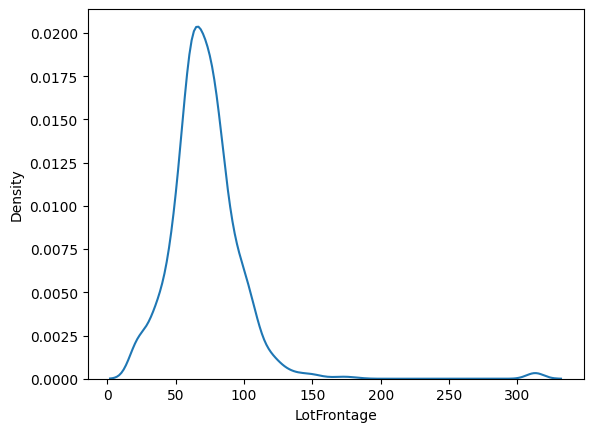

In [21]:
print(df['LotFrontage'].median())
print(df['LotFrontage'].mean())
sns.kdeplot(df['LotFrontage']) # .value_counts()

In [22]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [23]:
df['GarageYrBlt'].value_counts().head(10)

GarageYrBlt
2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
1977.0     57
2008.0     50
1999.0     45
1998.0     40
2002.0     38
Name: count, dtype: int64

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

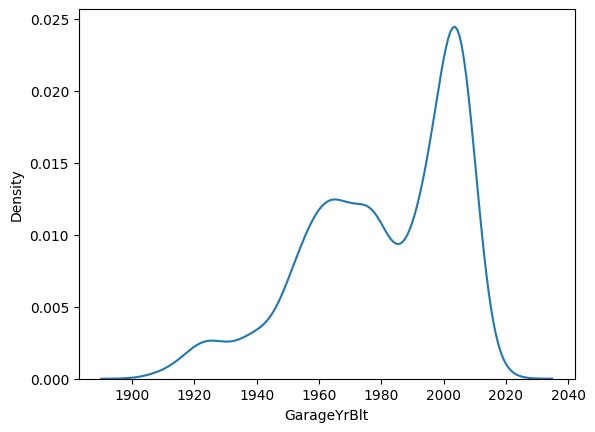

In [24]:
sns.kdeplot(df['GarageYrBlt'])

In [25]:
gr_yr_blt_top5 = df['GarageYrBlt'].value_counts().head(5).index
gr_yr_blt_top5

Index([2005.0, 2006.0, 2007.0, 2003.0, 2004.0], dtype='float64', name='GarageYrBlt')

In [26]:
gr_yr_blt_fill_val = np.random.choice(gr_yr_blt_top5,size=113)
print(gr_yr_blt_fill_val.shape)

(113,)


In [27]:
gr_yr_blt_nv_idx = df[df['GarageYrBlt'].isnull()].index
len(gr_yr_blt_nv_idx)

113

In [28]:
df.loc[gr_yr_blt_nv_idx,'GarageYrBlt'] = gr_yr_blt_fill_val

In [29]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [30]:
nv_df = count_per_null(df)
nv_df

Feature  Count   Percent
0  Electrical      1  0.048239

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(2072, 78)

In [33]:
nv_df = count_per_null(df)
nv_df

Empty DataFrame
Columns: [Feature, Count, Percent]
Index: []

#### 2) Handle Duplicates

In [34]:
df.duplicated().sum()

13

In [35]:
df.drop_duplicates(inplace=True)
df.shape

(2059, 78)

#### 3) Change Data Type

In [36]:
df.dtypes.head(50)

Id                  int64
Dwell_Type          int64
Zone_Class         object
LotFrontage       float64
LotArea             int64
Road_Type          object
Property_Shape     object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
Dwelling_Type      object
HouseStyle         object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
BsmtQual           object
BsmtCond           object
BsmtExposure       object
BsmtFinType1       object
BsmtFinSF1          int64
BsmtFinType2       object
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
Heating     

In [37]:
df.dtypes.tail(35)

2ndFlrSF                 int64
LowQualFinSF             int64
GrLivArea                int64
BsmtFullBath             int64
BsmtHalfBath             int64
FullBath                 int64
HalfBath                 int64
BedroomAbvGr             int64
KitchenAbvGr             int64
KitchenQual             object
TotRmsAbvGrd             int64
Functional              object
Fireplaces               int64
FireplaceQu             object
GarageType              object
GarageYrBlt            float64
GarageFinish            object
GarageCars               int64
GarageArea               int64
GarageQual              object
GarageCond              object
PavedDrive              object
WoodDeckSF               int64
OpenPorchSF              int64
EnclosedPorch            int64
3SsnPorch                int64
ScreenPorch              int64
PoolArea                 int64
Fence                   object
MiscVal                  int64
MoSold                   int64
YrSold                   int64
SaleType

#### 4) Separate Num and Cat Feat

In [38]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
dt_cols = ['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']
print(num_cols)
print(cat_cols)

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')
Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
  

### EDA - Exploratory Data Analysis

#### Univariate - Cat Cols - Countplot

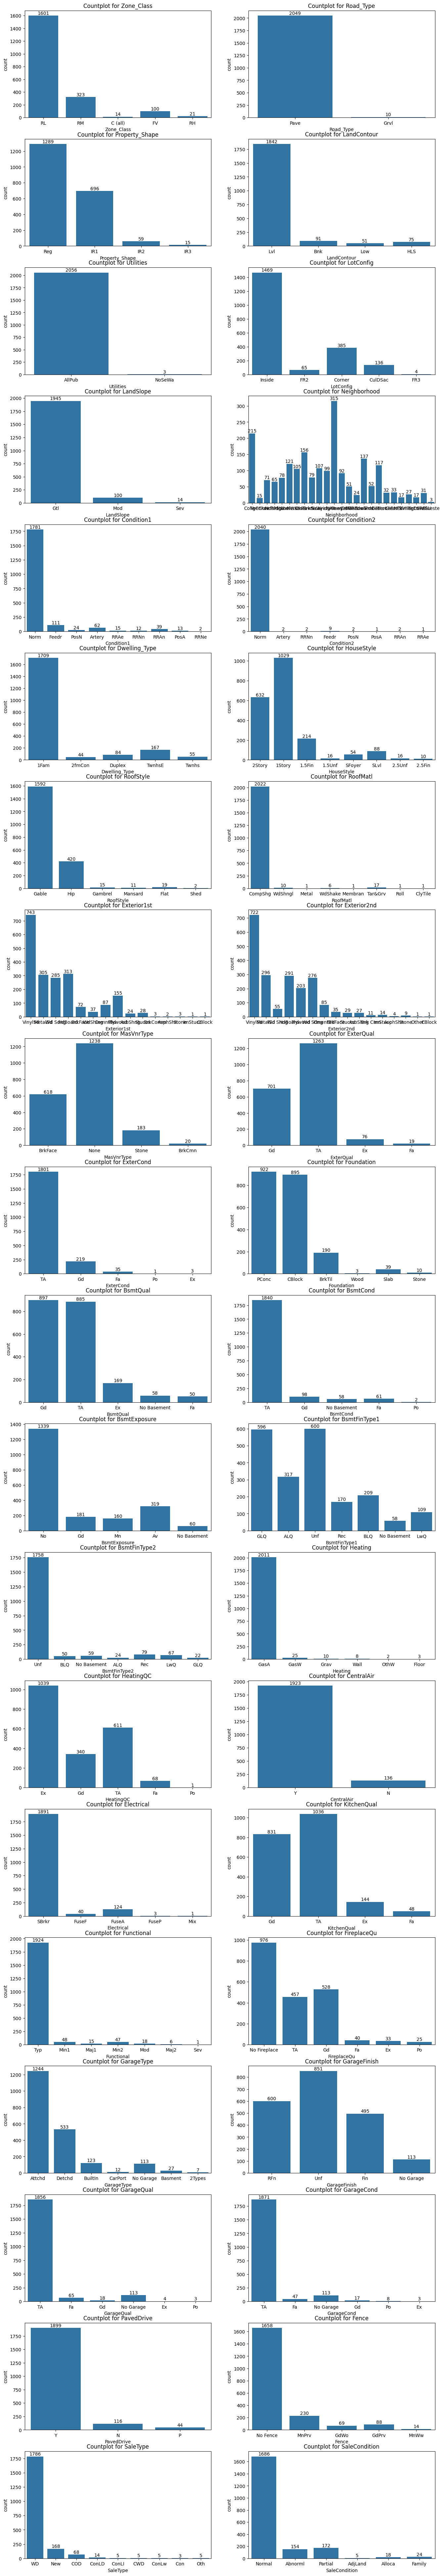

In [39]:
# len(cat_cols)  # 40
cols = cat_cols
plt.figure(figsize=(16,100))  # width = 16, height = 100
for i in range(len(cols)):
    plt.subplot(20,2,i+1)  # rows = 20, cols = 2
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

In [69]:
1924/2059

0.9344341913550267

#### Inference
1) Road_Type, Utilities, LandSlope, Condition2, RoofMatl, Heating, CentralAir, Functional can be dropped

#### Bi-variate - Cat-Num - Barplot 

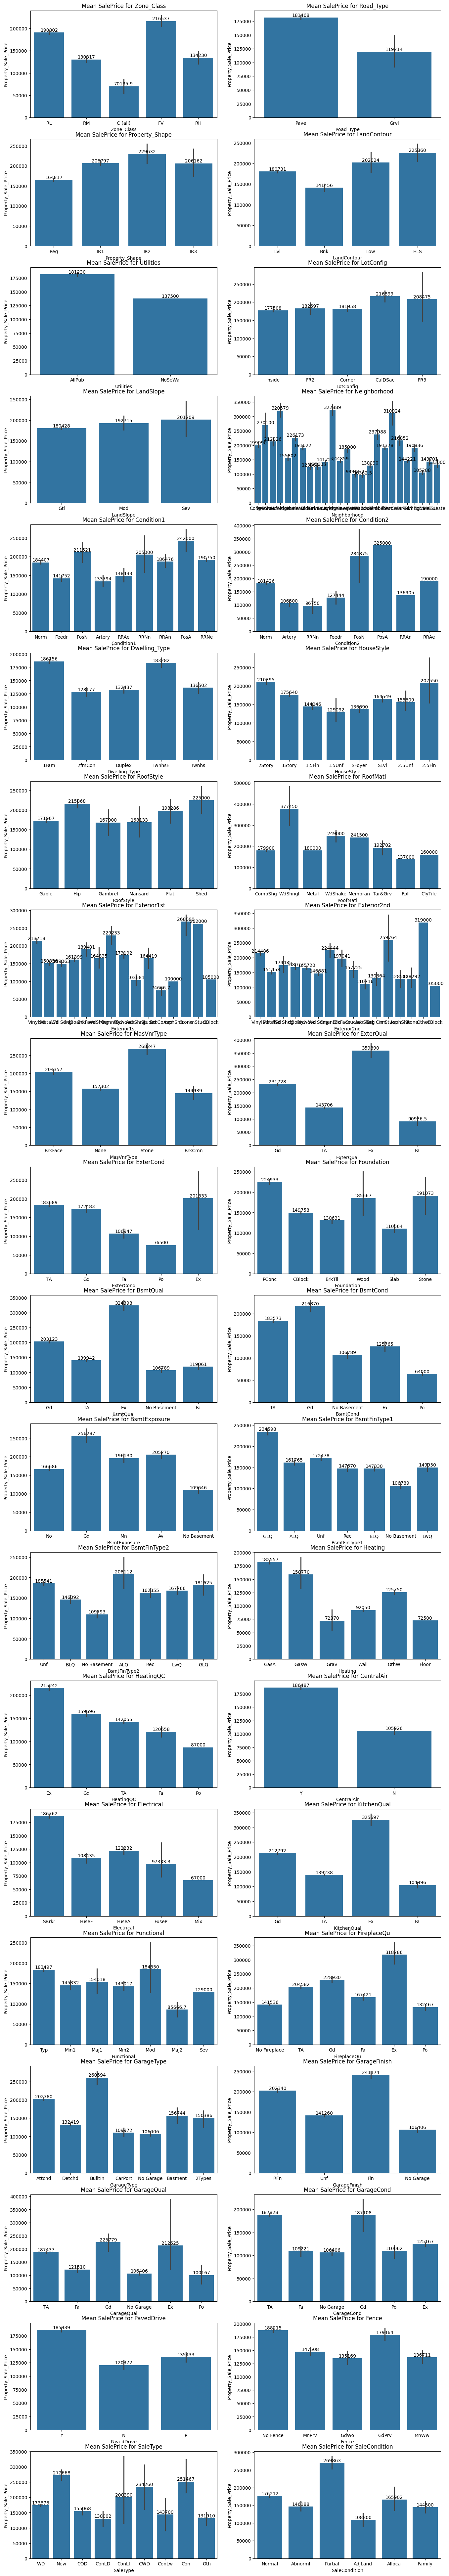

In [40]:
cols = cat_cols
plt.figure(figsize=(16,100))  # width = 16, height = 100
for i in range(len(cols)):
    plt.subplot(20,2,i+1)  # rows = 20, cols = 2
    ax = sns.barplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    ax.bar_label(ax.containers[0])
    plt.title(f'Mean SalePrice for {cols[i]}')
plt.show()

#### Univariate - Num - Histogram

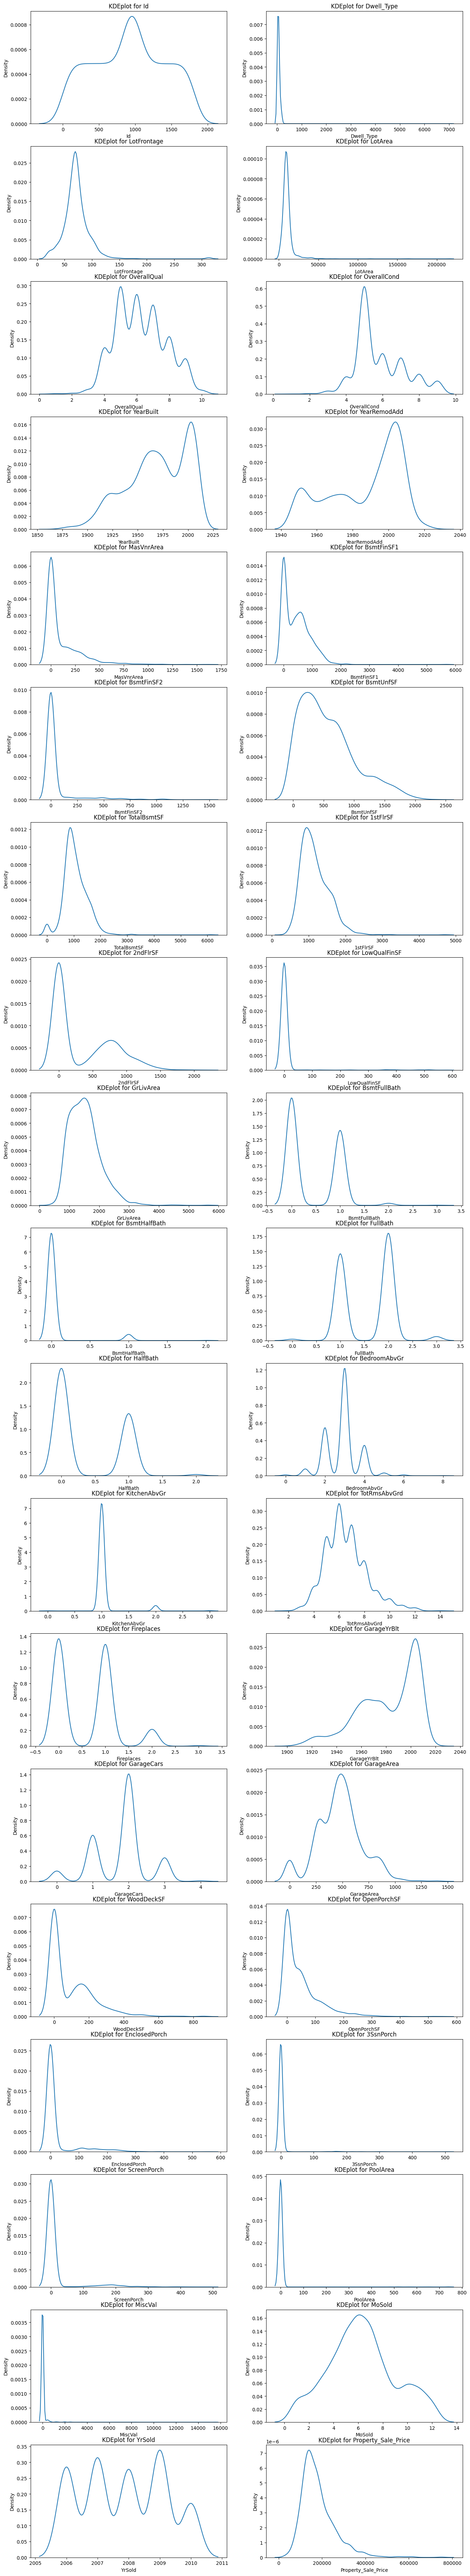

In [41]:
len(num_cols)  # 40

cols = num_cols
plt.figure(figsize=(16,95))  # width = 16, height = 100
for i in range(len(cols)):
    plt.subplot(19,2,i+1)    # rows = 20, cols = 2
    sns.kdeplot(x=df[cols[i]])
    plt.title(f'KDEplot for {cols[i]}')
plt.show()

#### Inference

Left Skewed - <br>
Right Skewed - 

#### Bi-variate - Num - Num - ScatterPlot

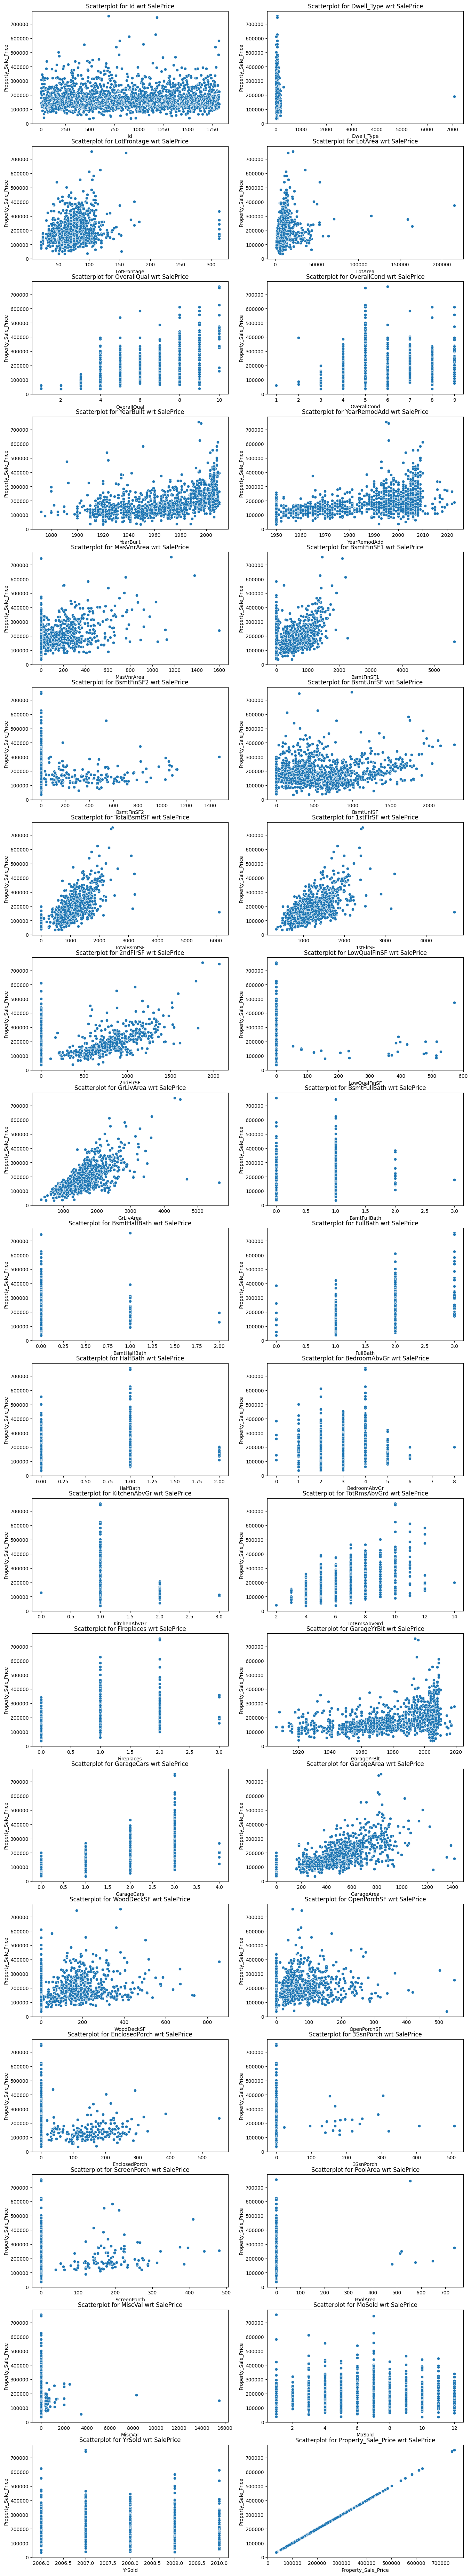

In [42]:
cols = num_cols
plt.figure(figsize=(16,95))  # width = 16, height = 100
for i in range(len(cols)):
    plt.subplot(19,2,i+1)    # rows = 20, cols = 2
    sns.scatterplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} wrt SalePrice')
plt.show()

#### Inference

1) DwellType, LowQualFinSF, 3SsnPorch, PoolArea, MiscVal can be dropped

In [45]:
df.shape

(2059, 78)

In [44]:
cols = ['Dwell_Type', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']
for i in cols:
    print(i,df[df[i]==0].shape)

Dwell_Type (0, 78)
LowQualFinSF (2020, 78)
3SsnPorch (2027, 78)
PoolArea (2051, 78)
MiscVal (1983, 78)


In [48]:
d1 = df.copy()
print(df.shape)

(2059, 78)


In [50]:
cols_2drop = ['Road_Type', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl',
              'Heating', 'CentralAir', 'Functional',
              'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']
df.drop(cols_2drop,axis=1,inplace=True)
df.shape

(2059, 66)

In [51]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'Property_Sale_Price'],
      dtype='object')
Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'Gar

#### Correlation (Detect Multicollinearity)
a) Between Independent features<br>
b) Between Target and Independent features

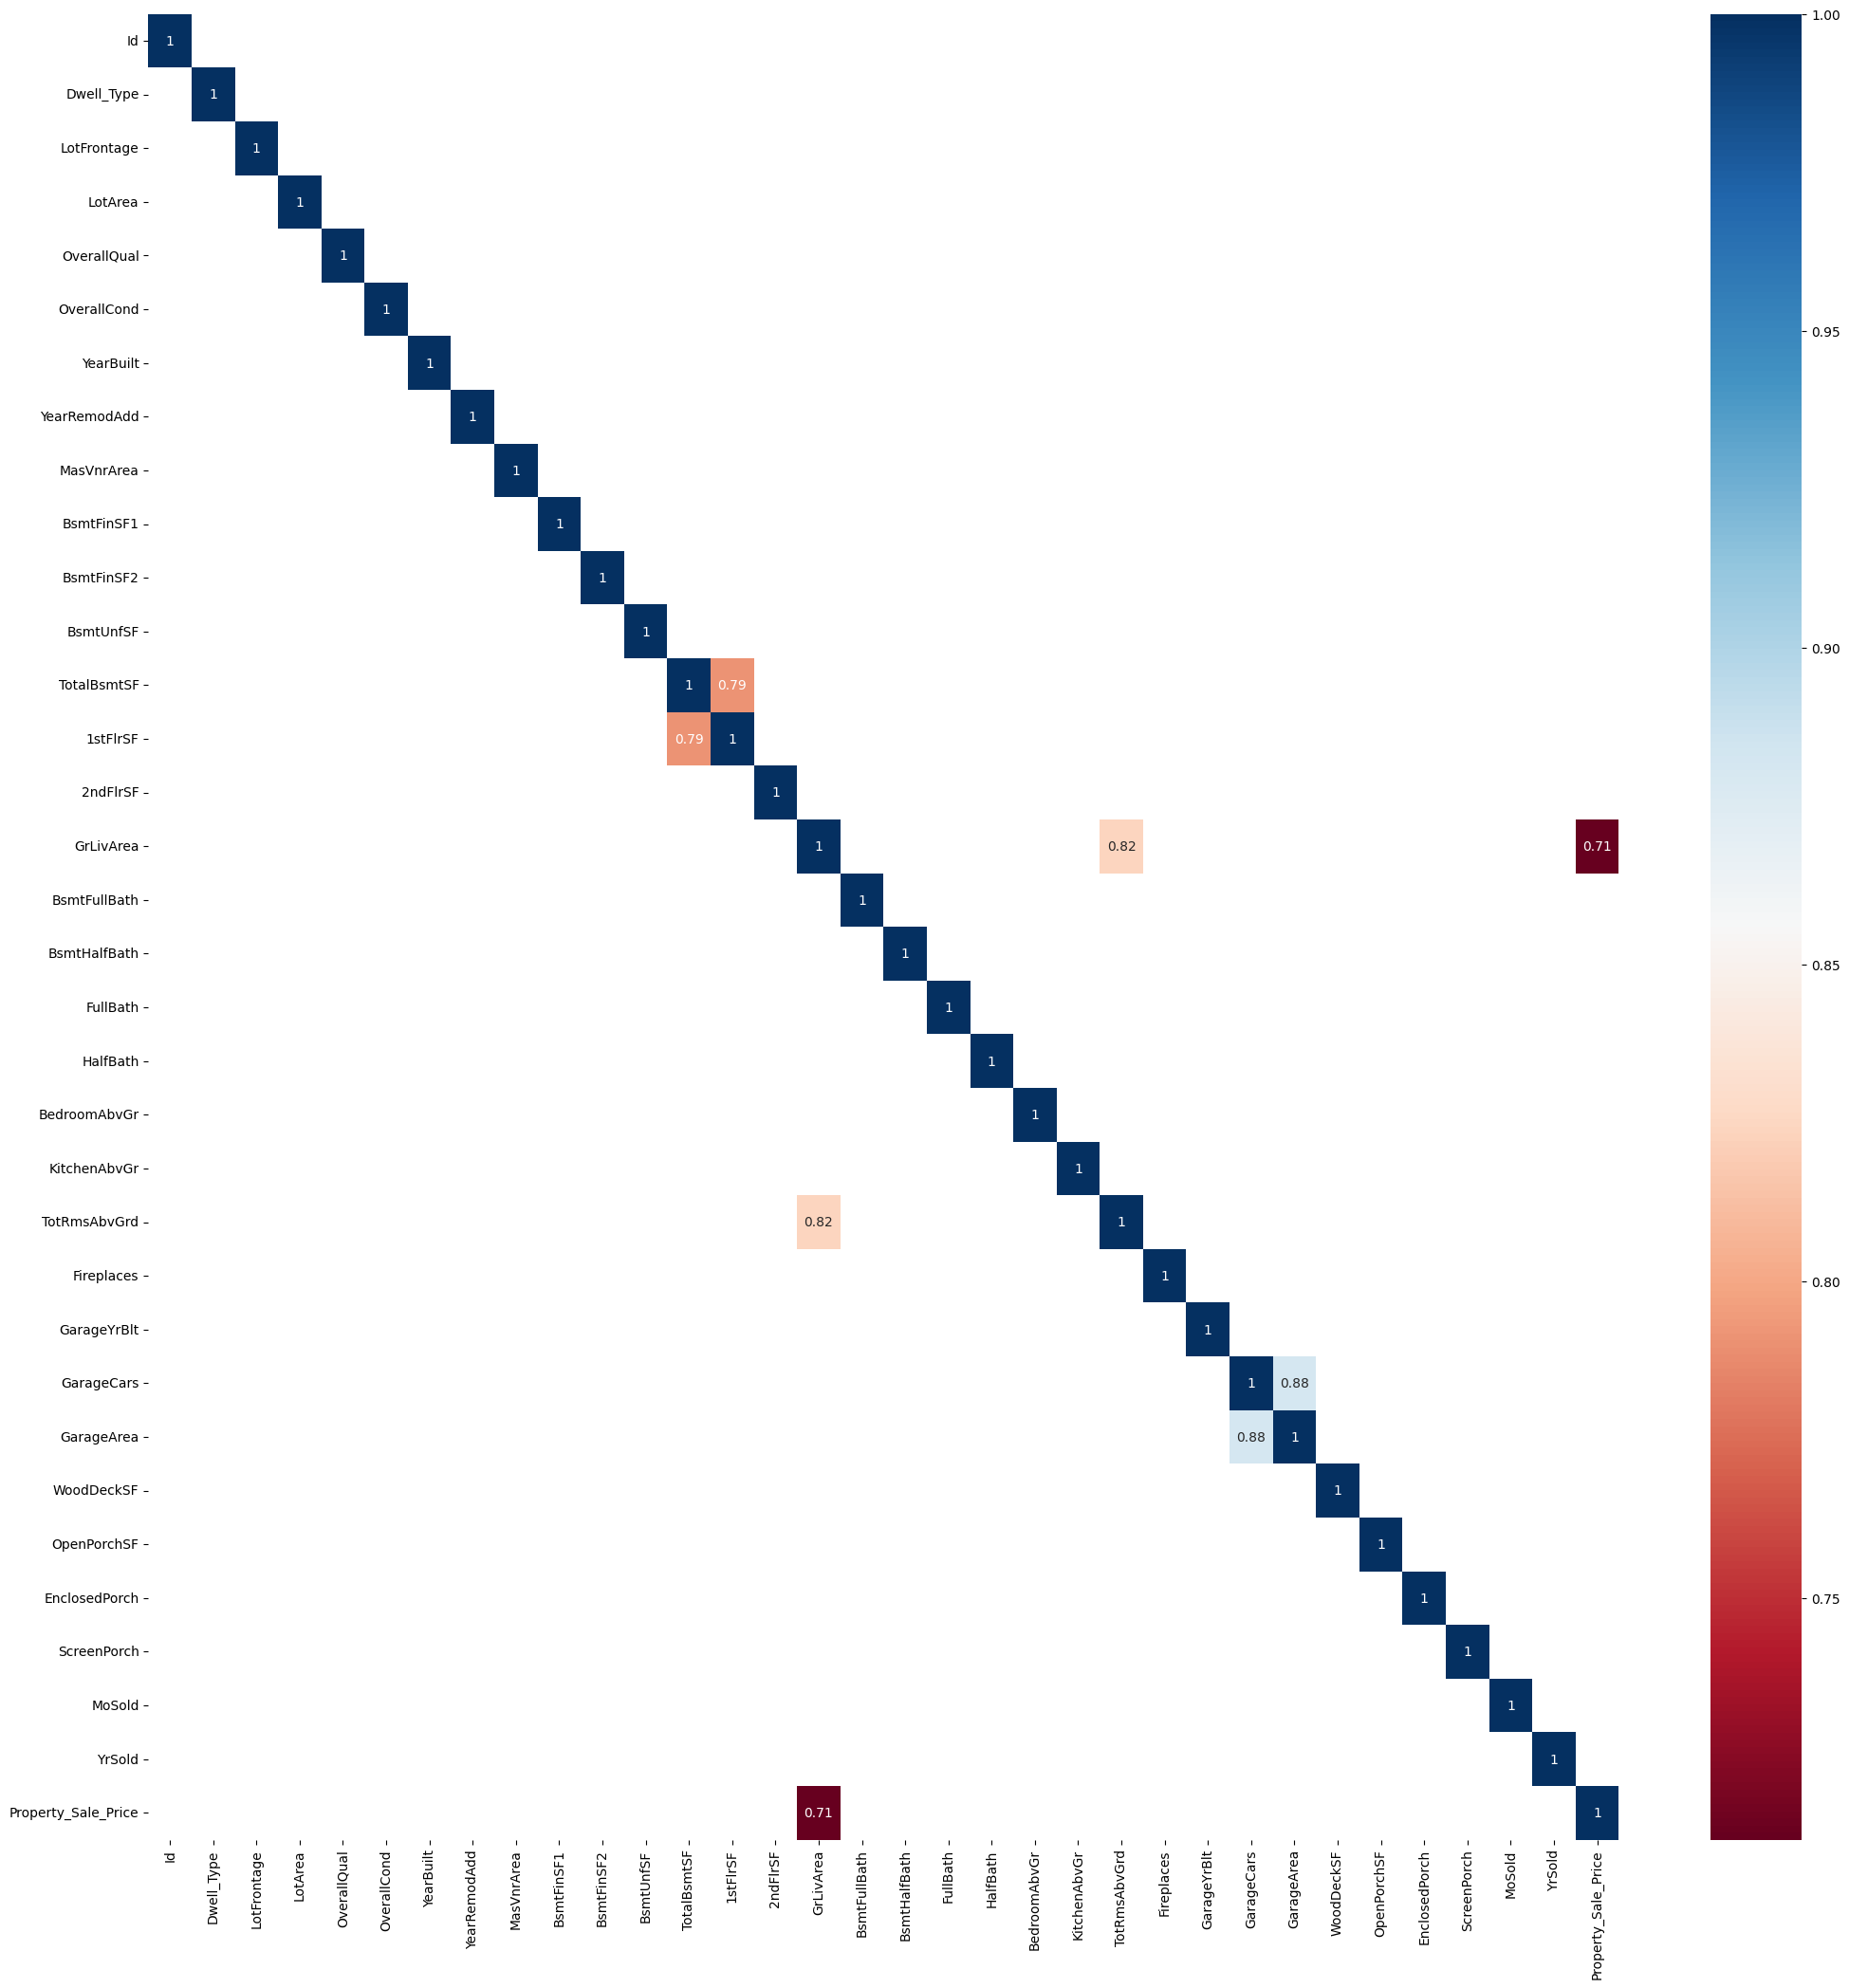

In [54]:
corr = df[num_cols].corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr) >= 0.7],annot=True,cmap='RdBu')
plt.show()

#### Inferncece
<pre>
1) GarageCars and GarageArea have corr = 0.88
2) TotRmsAbvGrd and GrLivArea have corr = 0.82
2) TotalBsmtSF and 1stFlrSF have corr = 0.79

In [57]:
cols_2drop_corr =  ['GarageCars','TotRmsAbvGrd','TotalBsmtSF']
df.drop(cols_2drop_corr,axis=1,inplace=True)
df.shape

(2059, 63)

#### Outlier Treatment Methods
<pre>
1) Extreme Outlier Treatment - Clipping / Capping
2) IQR method  - Clipping / Capping
3) Winsorization - Clipping / Capping

In [66]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)
len(num_cols)

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'Property_Sale_Price'],
      dtype='object')


31

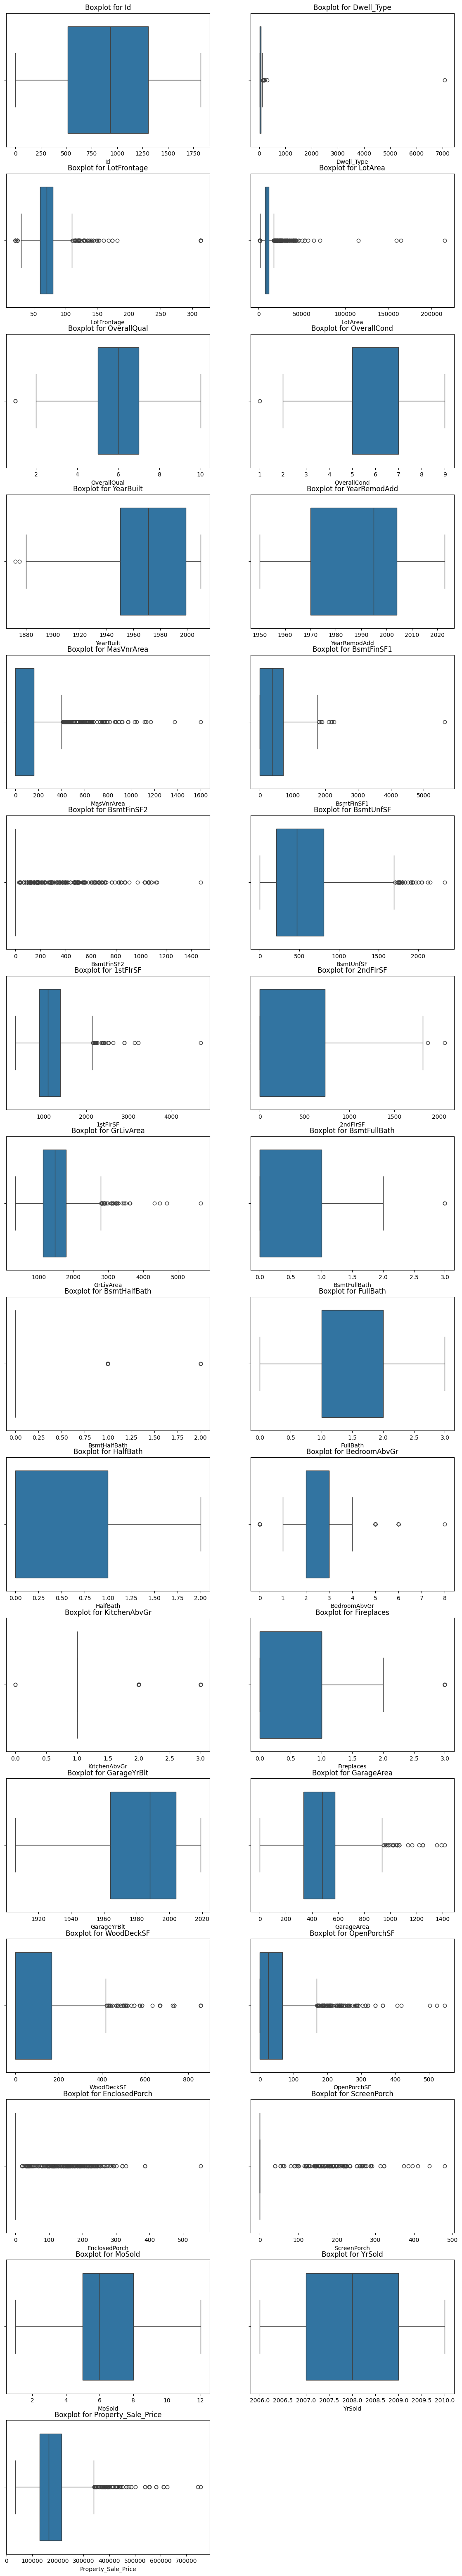

In [67]:
plt.figure(figsize=(14,80))
for i in range(len(num_cols)):
    plt.subplot(16,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

In [65]:
# cols_for_ot_check = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1',
#        'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
#        'GrLivArea','GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch',
#         'ScreenPorch', 'Property_Sale_Price']

# T = Transpose
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

min        1%        2%       5%       50%       95%  \
Id                       1.0     21.58     42.16    103.9     934.0    1717.1   
Dwell_Type              20.0     20.00     20.00     20.0      50.0     160.0   
LotFrontage             21.0     21.00     24.00     36.0      70.0     107.0   
LotArea               1300.0   1881.18   2268.00   3675.0    9497.0   20442.3   
OverallQual              1.0      3.00      4.00      4.0       6.0       9.0   
OverallCond              1.0      3.00      4.00      4.0       5.0       9.0   
YearBuilt             1872.0   1900.00   1905.16   1916.0    1971.0    2007.0   
YearRemodAdd          1950.0   1950.00   1950.00   1950.0    1995.0    2008.0   
MasVnrArea               0.0      0.00      0.00      0.0       0.0     448.0   
BsmtFinSF1               0.0      0.00      0.00      0.0     383.0    1238.8   
BsmtFinSF2               0.0      0.00      0.00      0.0       0.0     465.0   
BsmtUnfSF                0.0      0.00      0.00      0.0     466.0    1494.2   
1stFlrSF               334.0    531.80    606.12    684.0    1095.0    1828.3   
2ndFlrSF                 0.0      0.00      0.00      0.0       0.0    1141.1   
GrLivArea              334.0    693.58    768.00    848.0    1470.0    2450.0   
BsmtFullBath             0.0      0.00      0.00      0.0       0.0       1.0   
BsmtHalfBath             0.0      0.00      0.00      0.0       0.0       1.0   
FullBath                 0.0      1.00      1.00      1.0       2.0       2.0   
HalfBath                 0.0      0.00      0.00      0.0       0.0       1.0   
BedroomAbvGr             0.0      1.00      1.00      2.0       3.0       4.0   
KitchenAbvGr             0.0      1.00      1.00      1.0       1.0       1.1   
Fireplaces               0.0      0.00      0.00      0.0       1.0       2.0   
GarageYrBlt           1906.0   1920.00   1922.00   1935.0    1988.0    2007.0   
GarageArea               0.0      0.00      0.00      0.0     480.0     853.0   
WoodDeckSF               0.0      0.00      0.00      0.0       0.0     342.0   
OpenPorchSF              0.0      0.00      0.00      0.0      25.0     172.2   
EnclosedPorch            0.0      0.00      0.00      0.0       0.0     172.2   
ScreenPorch              0.0      0.00      0.00      0.0       0.0     163.2   
MoSold                   1.0      1.00      1.00      2.0       6.0      11.0   
YrSold                2006.0   2006.00   2006.00   2006.0    2008.0    2010.0   
Property_Sale_Price  34900.0  64500.00  78160.00  88000.0  164000.0  328000.0   

                           98%        99%       max  
Id                     1778.84    1799.42    1820.0  
Dwell_Type              190.00     190.00    7080.0  
LotFrontage             121.00     140.42     313.0  
LotArea               32395.16   40963.22  215245.0  
OverallQual               9.00       9.00      10.0  
OverallCond               9.00       9.00       9.0  
YearBuilt              2008.00    2009.00    2010.0  
YearRemodAdd           2011.84    2017.00    2023.0  
MasVnrArea              651.00     778.72    1600.0  
BsmtFinSF1             1439.36    1572.42    5644.0  
BsmtFinSF2              670.00     852.76    1474.0  
BsmtUnfSF              1694.00    1800.00    2336.0  
1stFlrSF               2066.44    2217.00    4692.0  
2ndFlrSF               1320.00    1414.00    2065.0  
GrLivArea              2729.68    3082.00    5642.0  
BsmtFullBath              1.00       2.00       3.0  
BsmtHalfBath              1.00       1.00       2.0  
FullBath                  2.00       3.00       3.0  
HalfBath                  1.00       1.00       2.0  
BedroomAbvGr              4.00       5.00       8.0  
KitchenAbvGr              2.00       2.00       3.0  
Fireplaces                2.00       2.00       3.0  
GarageYrBlt            2009.00    2010.00    2019.0  
GarageArea              902.00     988.04    1418.0  
WoodDeckSF              440.68     517.84     857.0  
OpenPorchSF             239.

In [68]:
cols_left_sk = ['LotArea','1stFlrSF','GrLivArea','Property_Sale_Price']

cols_right_sk = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1',
         'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
         'GrLivArea','GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch',
         'ScreenPorch', 'Property_Sale_Price']

In [70]:
d2 = df.copy()

In [73]:
for i in cols_left_sk:
    lower = df[i].quantile(0.01)
#     print(i,lower)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [74]:
for i in cols_right_sk:
    upper = df[i].quantile(0.99)
#     print(i,upper)
    df[i] = np.where(df[i]>upper,upper, df[i])

In [75]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

min          1%        2%       5%       50%  \
Id                       1.00     21.5800     42.16    103.9     934.0   
Dwell_Type              20.00     20.0000     20.00     20.0      50.0   
LotFrontage             21.00     21.0000     24.00     36.0      70.0   
LotArea               1881.18   1886.2956   2268.00   3675.0    9497.0   
OverallQual              1.00      3.0000      4.00      4.0       6.0   
OverallCond              1.00      3.0000      4.00      4.0       5.0   
YearBuilt             1872.00   1900.0000   1905.16   1916.0    1971.0   
YearRemodAdd          1950.00   1950.0000   1950.00   1950.0    1995.0   
MasVnrArea               0.00      0.0000      0.00      0.0       0.0   
BsmtFinSF1               0.00      0.0000      0.00      0.0     383.0   
BsmtFinSF2               0.00      0.0000      0.00      0.0       0.0   
BsmtUnfSF                0.00      0.0000      0.00      0.0     466.0   
1stFlrSF               531.80    534.2360    606.12    684.0    1095.0   
2ndFlrSF                 0.00      0.0000      0.00      0.0       0.0   
GrLivArea              693.58    693.8236    768.00    848.0    1470.0   
BsmtFullBath             0.00      0.0000      0.00      0.0       0.0   
BsmtHalfBath             0.00      0.0000      0.00      0.0       0.0   
FullBath                 0.00      1.0000      1.00      1.0       2.0   
HalfBath                 0.00      0.0000      0.00      0.0       0.0   
BedroomAbvGr             0.00      1.0000      1.00      2.0       3.0   
KitchenAbvGr             0.00      1.0000      1.00      1.0       1.0   
Fireplaces               0.00      0.0000      0.00      0.0       1.0   
GarageYrBlt           1906.00   1920.0000   1922.00   1935.0    1988.0   
GarageArea               0.00      0.0000      0.00      0.0     480.0   
WoodDeckSF               0.00      0.0000      0.00      0.0       0.0   
OpenPorchSF              0.00      0.0000      0.00      0.0      25.0   
EnclosedPorch            0.00      0.0000      0.00      0.0       0.0   
ScreenPorch              0.00      0.0000      0.00      0.0       0.0   
MoSold                   1.00      1.0000      1.00      2.0       6.0   
YrSold                2006.00   2006.0000   2006.00   2006.0    2008.0   
Property_Sale_Price  64500.00  64500.0000  78160.00  88000.0  164000.0   

                          95%        98%          99%        max  
Id                     1717.1    1778.84    1799.4200    1820.00  
Dwell_Type              160.0     190.00     190.0000    7080.00  
LotFrontage             107.0     121.00     140.1764     140.42  
LotArea               20442.3   32395.16   40941.0524   40963.22  
OverallQual               9.0       9.00       9.0000      10.00  
OverallCond               9.0       9.00       9.0000       9.00  
YearBuilt              2007.0    2008.00    2009.0000    2010.00  
YearRemodAdd           2008.0    2011.84    2017.0000    2023.00  
MasVnrArea              448.0     651.00     774.8224     778.72  
BsmtFinSF1             1238.8    1439.36    1572.1764    1572.42  
BsmtFinSF2              465.0     670.00     845.9392     852.76  
BsmtUnfSF              1494.2    1694.00    1800.0000    1800.00  
1stFlrSF               1828.3    2066.44    2217.0000    2217.00  
2ndFlrSF               1141.1    1320.00    1414.0000    1414.00  
GrLivArea              2450.0    2729.68    3082.0000    3082.00  
BsmtFullBath              1.0       1.00       2.0000       3.00  
BsmtHalfBath              1.0       1.00       1.0000       2.00  
FullBath                  2.0       2.00       3.0000       3.00  
HalfBath                  1.0       1.00       1.0000       2.00  
BedroomAbvGr              4.0       4.00       5.0000       8.00  
KitchenAbvGr              1.1       2.00       2.0000       3.00  
Fireplaces                2.0       2.00       2.0000       3.00  
GarageYrBlt            2007.0    2009.00    2010.0000    2019.00  
GarageArea              853.0     902.00     985.

In [76]:
df['Dwell_Type'] = np.where(df['Dwell_Type'] > 190,190,df['Dwell_Type'])

#### Encoding
Convert Catgeorical To Numerical 

In [78]:
df.shape

(2059, 63)

In [77]:
cat_cols = df.dtypes[df.dtypes=='object'].index
for i in cat_cols:
    print(i,df[i].nunique())

Zone_Class 5
Property_Shape 4
LandContour 4
LotConfig 5
Neighborhood 25
Condition1 9
Dwelling_Type 5
HouseStyle 8
RoofStyle 6
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
HeatingQC 5
Electrical 5
KitchenQual 4
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
Fence 5
SaleType 9
SaleCondition 6


In [79]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      315
CollgCr    215
OldTown    156
Edwards    137
Somerst    121
Gilbert    117
Sawyer     107
NWAmes     105
NridgHt     99
SawyerW     92
BrkSide     79
Mitchel     78
Crawfor     71
NoRidge     65
Timber      52
IDOTRR      51
ClearCr     33
StoneBr     32
SWISU       31
Blmngtn     27
MeadowV     24
NPkVill     17
BrDale      17
Veenker     15
Blueste      3
Name: count, dtype: int64

In [83]:
df['Neighborhood'] = np.where(df['Neighborhood'].isin(['NoRidge','NridgHt',
                                                'Veenker','Timber','StoneBr']),'Grp1','Grp2')
df['Neighborhood'].value_counts()

Neighborhood
Grp2    1796
Grp1     263
Name: count, dtype: int64

In [89]:
len(cat_cols)

32

In [93]:
cat_cols

Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [90]:
# Exterior1st, Exterior2nd
cols_2encode = ['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle','MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition']
len(cols_2encode)

30

In [92]:
df_dummies = pd.get_dummies(data=df,columns=cols_2encode,dtype=int,drop_first=True)
print(df_dummies.shape)

(2059, 165)


#### Assumption Check : Target var is normally dist

In [94]:
# Jarque_Bera(>5000) and Shapiro (<5000)

from scipy.stats import shapiro  # test_stat, p
# Ho : data is normally dist , if   p>0.05
# H1 : data is not normally dist, is p <=0.05

In [99]:
print(shapiro(df_dummies['Property_Sale_Price']))  
print(shapiro(np.log(df_dummies['Property_Sale_Price'])))  
print(shapiro(np.sqrt(df_dummies['Property_Sale_Price'])))
print(shapiro(df_dummies['Property_Sale_Price']**2))

ShapiroResult(statistic=0.910859227180481, pvalue=3.845865969611232e-33)
ShapiroResult(statistic=0.9929962754249573, pvalue=2.4040314627882253e-08)
ShapiroResult(statistic=0.9663689732551575, pvalue=1.6354511816006256e-21)
ShapiroResult(statistic=0.751335620880127, pvalue=0.0)


<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

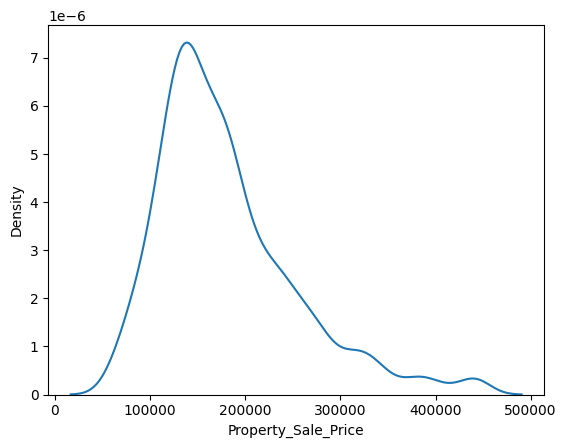

In [97]:
sns.kdeplot(df['Property_Sale_Price'])

<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

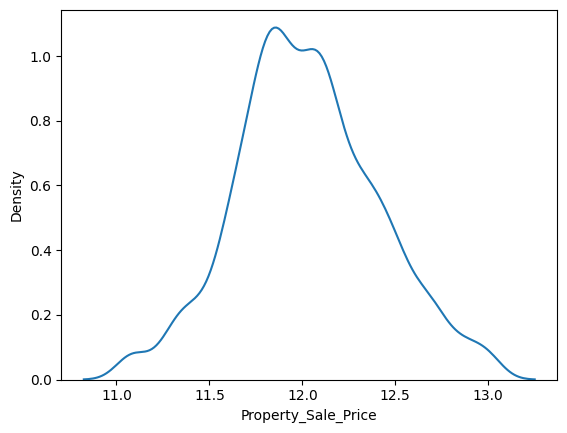

In [98]:
sns.kdeplot(np.log(df['Property_Sale_Price']))

In [105]:
df_dummies.dtypes.value_counts()

int32      132
float64     16
int64       15
object       2
Name: count, dtype: int64

In [109]:
# df_dummies.dtypes.head(50)

#### Select x and y

In [122]:
x = df_dummies.drop(['Id','Exterior1st', 'Exterior2nd','Property_Sale_Price'],axis=1)
y = np.log(df_dummies['Property_Sale_Price'])
print(x.shape)
print(y.shape)

(2059, 161)
(2059,)


### Assumption Check - No Multicollinearity (VIF) 
1) Helps detect Multicollinearity<br>
2) Feature selection

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif.head(20)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature           VIF
134      GarageQual_No Garage           inf
85       BsmtQual_No Basement           inf
139      GarageCond_No Garage           inf
98   BsmtFinType1_No Basement           inf
128      GarageType_No Garage           inf
88       BsmtCond_No Basement           inf
129    GarageFinish_No Garage           inf
28                     YrSold  4.328237e+04
21                GarageYrBlt  3.130888e+04
6                YearRemodAdd  2.817796e+04
5                   YearBuilt  1.431170e+04
141             GarageCond_TA  3.025003e+03
136             GarageQual_TA  2.362442e+03
13                  GrLivArea  8.937955e+02
77               ExterCond_TA  6.819584e+02
11                   1stFlrSF  5.979802e+02
123         GarageType_Attchd  2.126153e+02
31              Zone_Class_RL  1.629008e+02
106          BsmtFinType2_Unf  1.307098e+02
63            RoofStyle_Gable  1.217664e+02

In [125]:
cols_with_high_vif = vif['Feature'][vif['VIF']==np.inf].values
print(cols_with_high_vif)

['GarageQual_No Garage' 'BsmtQual_No Basement' 'GarageCond_No Garage'
 'BsmtFinType1_No Basement' 'GarageType_No Garage' 'BsmtCond_No Basement'
 'GarageFinish_No Garage']


In [126]:
x = x.drop(cols_with_high_vif,axis=1)
print(x.shape)

(2059, 154)


In [135]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [136]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif.head(20)

KeyboardInterrupt: 

In [129]:
thresh = 1000
cols_with_high_vif2 = vif['Feature'][vif['VIF']>thresh].values
print(cols_with_high_vif2)

['YrSold' 'GarageYrBlt' 'YearRemodAdd' 'YearBuilt' 'GarageCond_TA'
 'GarageQual_TA']


In [131]:
# x.shape
xcopy = x.copy()

In [132]:
x = x.drop(cols_with_high_vif2,axis=1)
print(x.shape)

(2059, 148)


### OLS - M1
1) Used to determine mode paramters (m and c)<br>
2) Helps is feature selection.

In [134]:
import statsmodels.api as sm

In [138]:
x1 = x.copy()
y1 = y.copy()
print(x1.shape)
print(y1.shape)

(2059, 148)
(2059,)


In [139]:
x1 = sm.add_constant(x1)       # ensures that model uses (c) => y = mx + c
ols_m1 = sm.OLS(y1,x1).fit()
print(ols_m1.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.910
Model:                             OLS   Adj. R-squared:                  0.903
Method:                  Least Squares   F-statistic:                     129.7
Date:                 Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                         12:59:20   Log-Likelihood:                 1524.9
No. Observations:                 2059   AIC:                            -2752.
Df Residuals:                     1910   BIC:                            -1913.
Df Model:                          148                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [140]:
print("OLS_M1")
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS_M1
0.9095333143459896
0.9025233303267259


In [143]:
# thresh = 0.7
feat_with_high_p = ols_m1.pvalues[ols_m1.pvalues>0.7].index
print(len(feat_with_high_p))

23


#### OLS - Model - 2

In [144]:
x2 = x.drop(feat_with_high_p,axis=1)
y2 = y.copy()
print(x2.shape)
print(y2.shape)

(2059, 125)
(2059,)


In [145]:
x2 = sm.add_constant(x2)
ols_m2 = sm.OLS(y2,x2).fit()
print(ols_m2.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.909
Model:                             OLS   Adj. R-squared:                  0.904
Method:                  Least Squares   F-statistic:                     155.3
Date:                 Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                         13:06:48   Log-Likelihood:                 1524.1
No. Observations:                 2059   AIC:                            -2796.
Df Residuals:                     1933   BIC:                            -2087.
Df Model:                          125                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [146]:
print("OLS_M1")
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)
print("OLS_M2")
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS_M1
0.9095333143459896
0.9025233303267259
OLS_M2
0.909460519692728
0.9036056645254187


#### Inference
1) Adj R2 has incrased in dropping feat => suggesting that those feat were insignificant<br>
2) Feat_with_high_p were insignificant hence they were dropped.

#### Assumption Check : Homoscedasticity
Constant varaince in error terms

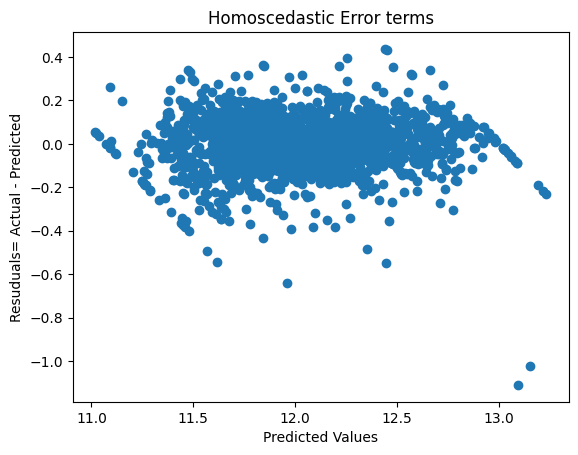

In [150]:
plt.scatter(ols_m2.predict(),ols_m2.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Resuduals = Actual - Predicted')
plt.title('Homoscedastic Error terms')
plt.show()

#### Assumptoion Check - Linearity
PairPlot

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(data=df_dummies,x_vars = num_cols,
             y_vars='Property_Sale_price')
plt.show()

#### Final Features for Linear Regression

In [149]:
x3 = x2.drop('const',axis=1)
y3 = y.copy()
print(x3.shape)
print(y3.shape)

(2059, 125)
(2059,)


#### Split data into train and test

In [152]:
from sklearn.model_selection import train_test_split

In [155]:
print(2059*0.3)

617.6999999999999


In [153]:
# Random_state ensures a shuffling order
x_train,x_test, y_train,y_test = train_test_split(x3,y3,test_size=0.3,
                                                 random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1441, 125) (618, 125)
(1441,) (618,)


In [154]:
x_train.head()

Dwell_Type  LotFrontage  OverallQual  OverallCond  BsmtFinSF1  \
311           20         50.0            6            6       680.0   
879           20         70.0            5            8       646.0   
405           20         70.0            4            4      1116.0   
1208          20         70.0            5            7       504.0   
1717          60        104.0            8            9       666.0   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleType_CWD  \
311          0.0      292.0     972.0       0.0      972.0  ...             0   
879          0.0      218.0     864.0       0.0      864.0  ...             0   
405          0.0      165.0    1620.0       0.0     1620.0  ...             0   
1208       108.0      319.0    1283.0       0.0     1283.0  ...             0   
1717         0.0      278.0     944.0     896.0     1840.0  ...             0   

      SaleType_Con  SaleType_ConLD  SaleType_New  SaleType_Oth  \
311              0               0             0             0   
879              0               0             0             0   
405              0               0             0             0   
1208             0               0             0             0   
1717             0               0             0             0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
311                       0                     0                     0   
879                       0                     0                     0   
405                       0                     0                     0   
1208                      0                     0                     0   
1717                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
311                      1                      0  
879                      1                      0  
405                      1                      0  
1208                     1                      0  
1717                     1                      0  

[5 rows x 125 columns]

#### Linear Reg

In [157]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import *

In [168]:
print(np.log(100))
print(np.exp(4.605170185988092))

4.605170185988092
100.00000000000004


In [166]:
np.log2(32) #  
print(np.exp())
# a**b = x => 2**5 = 32
# log(32) to base 2 = 5 

# 10**2 = 100
# print(np.log2(100))

5.0

In [169]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(np.exp(ytest),np.exp(ypred))
    mse = mean_squared_error(np.exp(ytest),np.exp(ypred))
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)  # log scale
    print('MAE',mae,'MSE',mse,'RMSE',rmse,'R2',r2)

#### Model Building

In [160]:
lr = LinearRegression()   # lr is an instance of LinearRegression
lr.fit(x_train,y_train)   # Model training => model.fit(x_train,y_train)

LinearRegression()

#### Generate Predictions

In [170]:
ypred = lr.predict(x_test)   # model.predict(x_test)
eval_model(y_test,ypred)

MAE 16078.300621534316 MSE 774647037.8515111 RMSE 27832.481704862596 R2 0.8856051497139733


#### Generate m (coef) and c (intercept)

In [162]:
m = lr.coef_
c = lr.intercept_
print('Intercept',c)
print('Coef Count',len(m))

Intercept 10.932582675457002
Coef Count 125


In [171]:
print('Train Score', lr.score(x_train,y_train))  # Traim R2 Score
print('Test Score', lr.score(x_test,y_test))    # Test R2 Score

Train Score 0.9142962728533308
Test Score 0.8856051497139733


#### Overfitting
1) Model with high train score and comparatively low test score<br>
2) Model has high varaince and low bais<br>

#### Underfitting
1) Model with high test score and comparatively low train score<br>
2) Model has high bias and low varaince.

#### Regularization
It is method to treat overfitting

Cost = MSE = (1/n)* sum(yi - (m * x + c))^2

It is of 3 types:
#### 1) Ridge
a) A small amount of bias is added to compensate for high varaince.<br>
b) Cost = (1/n)* sum(yi - (m * x + c))^2 + alpha * sum(m^2) <br>
c) reduces the model coef


#### 2) Lasso
a) A small amount of bias is added to compensate for high varaince.<br>
b) Cost = (1/n)* sum(yi - (m * x + c))^2 + alpha * sum(|m|) <br>
c) Reduces the model coef but transforms many coef to 0. So it helps in Feature selection.

alphe = regularization coef

#### Ridge

In [179]:
rid1 = Ridge(alpha = 0.743)  # hit and trial, guess work
rid1.fit(x_train,y_train)

Ridge(alpha=0.743)

In [180]:
print('Lin Reg Score')
print('Train Score', lr.score(x_train,y_train))  # Train R2 Score
print('Test Score', lr.score(x_test,y_test))    # Test R2 Score

print('Ridge Reg Score')
print('Train Score', rid1.score(x_train,y_train))  # Trai R2 Score
print('Test Score', rid1.score(x_test,y_test))    # Test R2 Score

Lin Reg Score
Train Score 0.9142962728533308
Test Score 0.8856051497139733
Ridge Reg Score
Train Score 0.9136711847506593
Test Score 0.8863527317515324


### Inference => Overfit is slighly minimized

In [185]:
las1 = Lasso(alpha = 0.306)  # hit and trial, guess work
las1.fit(x_train,y_train)

Lasso(alpha=0.306)

In [187]:
print('Lin Reg Score')
print('Train Score', lr.score(x_train,y_train))  # Train R2 Score
print('Test Score', lr.score(x_test,y_test))    # Test R2 Score

print('Ridge Reg Score')
print('Train Score', las1.score(x_train,y_train))  # Train R2 Score
print('Test Score', las1.score(x_test,y_test))    # Test R2 Score

Lin Reg Score
Train Score 0.9142962728533308
Test Score 0.8856051497139733
Ridge Reg Score
Train Score 0.7598607816179772
Test Score 0.7662988634945089


In [188]:
las1.coef_

array([-5.82654020e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.73190187e-04,  2.35511650e-04,  2.83047836e-04,  2.34634602e-04,
        3.01172482e-04,  5.91828043e-05,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.52691048e-04,  2.40792125e-04,  4.40230106e-04, -2.52884648e-04,
        8.74677600e-05,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

#### Generate Prediction 

In [194]:
x_train.iloc[626]
print(np.exp(y_train.iloc[626]))  # actual sale price

130000.00000000006


In [198]:
print(lr.predict(x_train.iloc[[626]]))  ## Log scale
print(np.exp(lr.predict(x_train.iloc[[626]]))) ## act pred

[11.88260244]
[144726.70353602]


#### Model Saving

In [200]:
x_train.shape

(1441, 125)

In [199]:
import pickle

In [202]:
pickle.dump(lr,open('lr_model_23Aug.pkl','wb'))  # wb = write binary

In [203]:
### Read model
lr_model = pickle.load(open('lr_model_23Aug.pkl','rb'))  # rb = read binary